<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Le-pourcentage-d'inertie-associée-à-chaque-dimension" data-toc-modified-id="Le-pourcentage-d'inertie-associée-à-chaque-dimension-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Le pourcentage d'inertie associée à chaque dimension</a></span></li><li><span><a href="#L'influence-des-variables-dans-les-nouvelles-dimensions" data-toc-modified-id="L'influence-des-variables-dans-les-nouvelles-dimensions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>L'influence des variables dans les nouvelles dimensions</a></span></li><li><span><a href="#Classification-hiérarchique-ascendante" data-toc-modified-id="Classification-hiérarchique-ascendante-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Classification hiérarchique ascendante</a></span><ul class="toc-item"><li><span><a href="#Calcul-des-arbres" data-toc-modified-id="Calcul-des-arbres-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Calcul des arbres</a></span></li><li><span><a href="#Affichage-des-arbres" data-toc-modified-id="Affichage-des-arbres-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Affichage des arbres</a></span></li><li><span><a href="#Prédiction-des-classes" data-toc-modified-id="Prédiction-des-classes-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Prédiction des classes</a></span></li><li><span><a href="#Affichage-des-clusters" data-toc-modified-id="Affichage-des-clusters-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Affichage des clusters</a></span></li></ul></li><li><span><a href="#Clustering-non-hiérarchique" data-toc-modified-id="Clustering-non-hiérarchique-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Clustering non hiérarchique</a></span></li></ul></div>

In [1]:
import pandas as pd               
import seaborn as sns  
import warnings
import os

import matplotlib.font_manager as fm
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

%pylab inline

plt.style.use('seaborn-darkgrid')
sns.set(font_scale=3)
warnings.filterwarnings(action="ignore")

os.chdir("../donnees")

Populating the interactive namespace from numpy and matplotlib


In [2]:
%%time
temperatures = pd.read_parquet('temperatures.gzip', engine='pyarrow')
temperatures.head()

Wall time: 38.3 ms


janv.     févr.       mars  \
Nom       Latitude  Longitude Altitude Zone                                  
Abbeville 50.136000 1.834000  69       NO    4.339488  4.961508   7.159573   
Ajaccio   41.918000 8.792667  5        SE    8.845452  9.020222  10.923023   
Alencon   48.445500 0.110167  143      NO    4.360548  4.935061   7.315260   
Bale      47.614333 7.510000  263      NE    1.997963  3.016738   6.601501   
Bastia    42.540667 9.485167  10       SE    9.011034  9.158366  11.222681   

                                                  avr.        mai       juin  \
Nom       Latitude  Longitude Altitude Zone                                    
Abbeville 50.136000 1.834000  69       NO     9.818468  12.974397  15.831397   
Ajaccio   41.918000 8.792667  5        SE    13.630346  17.333195  21.449760   
Alencon   48.445500 0.110167  143      NO    10.000312  13.440577  16.795848   
Bale      47.614333 7.510000  263      NE    10.567396  14.848118  18.719350   
Bastia    42.540667 9.485167  10       SE    13.814283  17.732465  22.010528   

                                                juill.       août      sept.  \
Nom       Latitude  Longitude Altitude Zone                                    
Abbeville 50.136000 1.834000  69       NO    17.636887  17.744688  15.344691   
Ajaccio   41.918000 8.792667  5        SE    23.778255  23.849876  20.827605   
Alencon   48.445500 0.110167  143      NO    18.551608  18.346818  15.402646   
Bale      47.614333 7.510000  263      NE    20.052836  19.562820  15.413585   
Bastia    42.540667 9.485167  10       SE    24.744154  24.773452  21.194754   

                                                  oct.       nov.       déc.  
Nom       Latitude  Longitude Altitude Zone                                   
Abbeville 50.136000 1.834000  69       NO    11.884938   7.807354   5.241632  
Ajaccio   41.918000 8.792667  5        SE    17.428642  13.107521   9.916328  
Alencon   48.445500 0.110167  143      NO    11.760500   7.611062   5.067731  
Bale      47.614333 7.510000  263      NE    10.943476   5.874690   2.970391  
Bastia    42.540667 9.485167  10       SE    17.341999  13.156176  10.097650

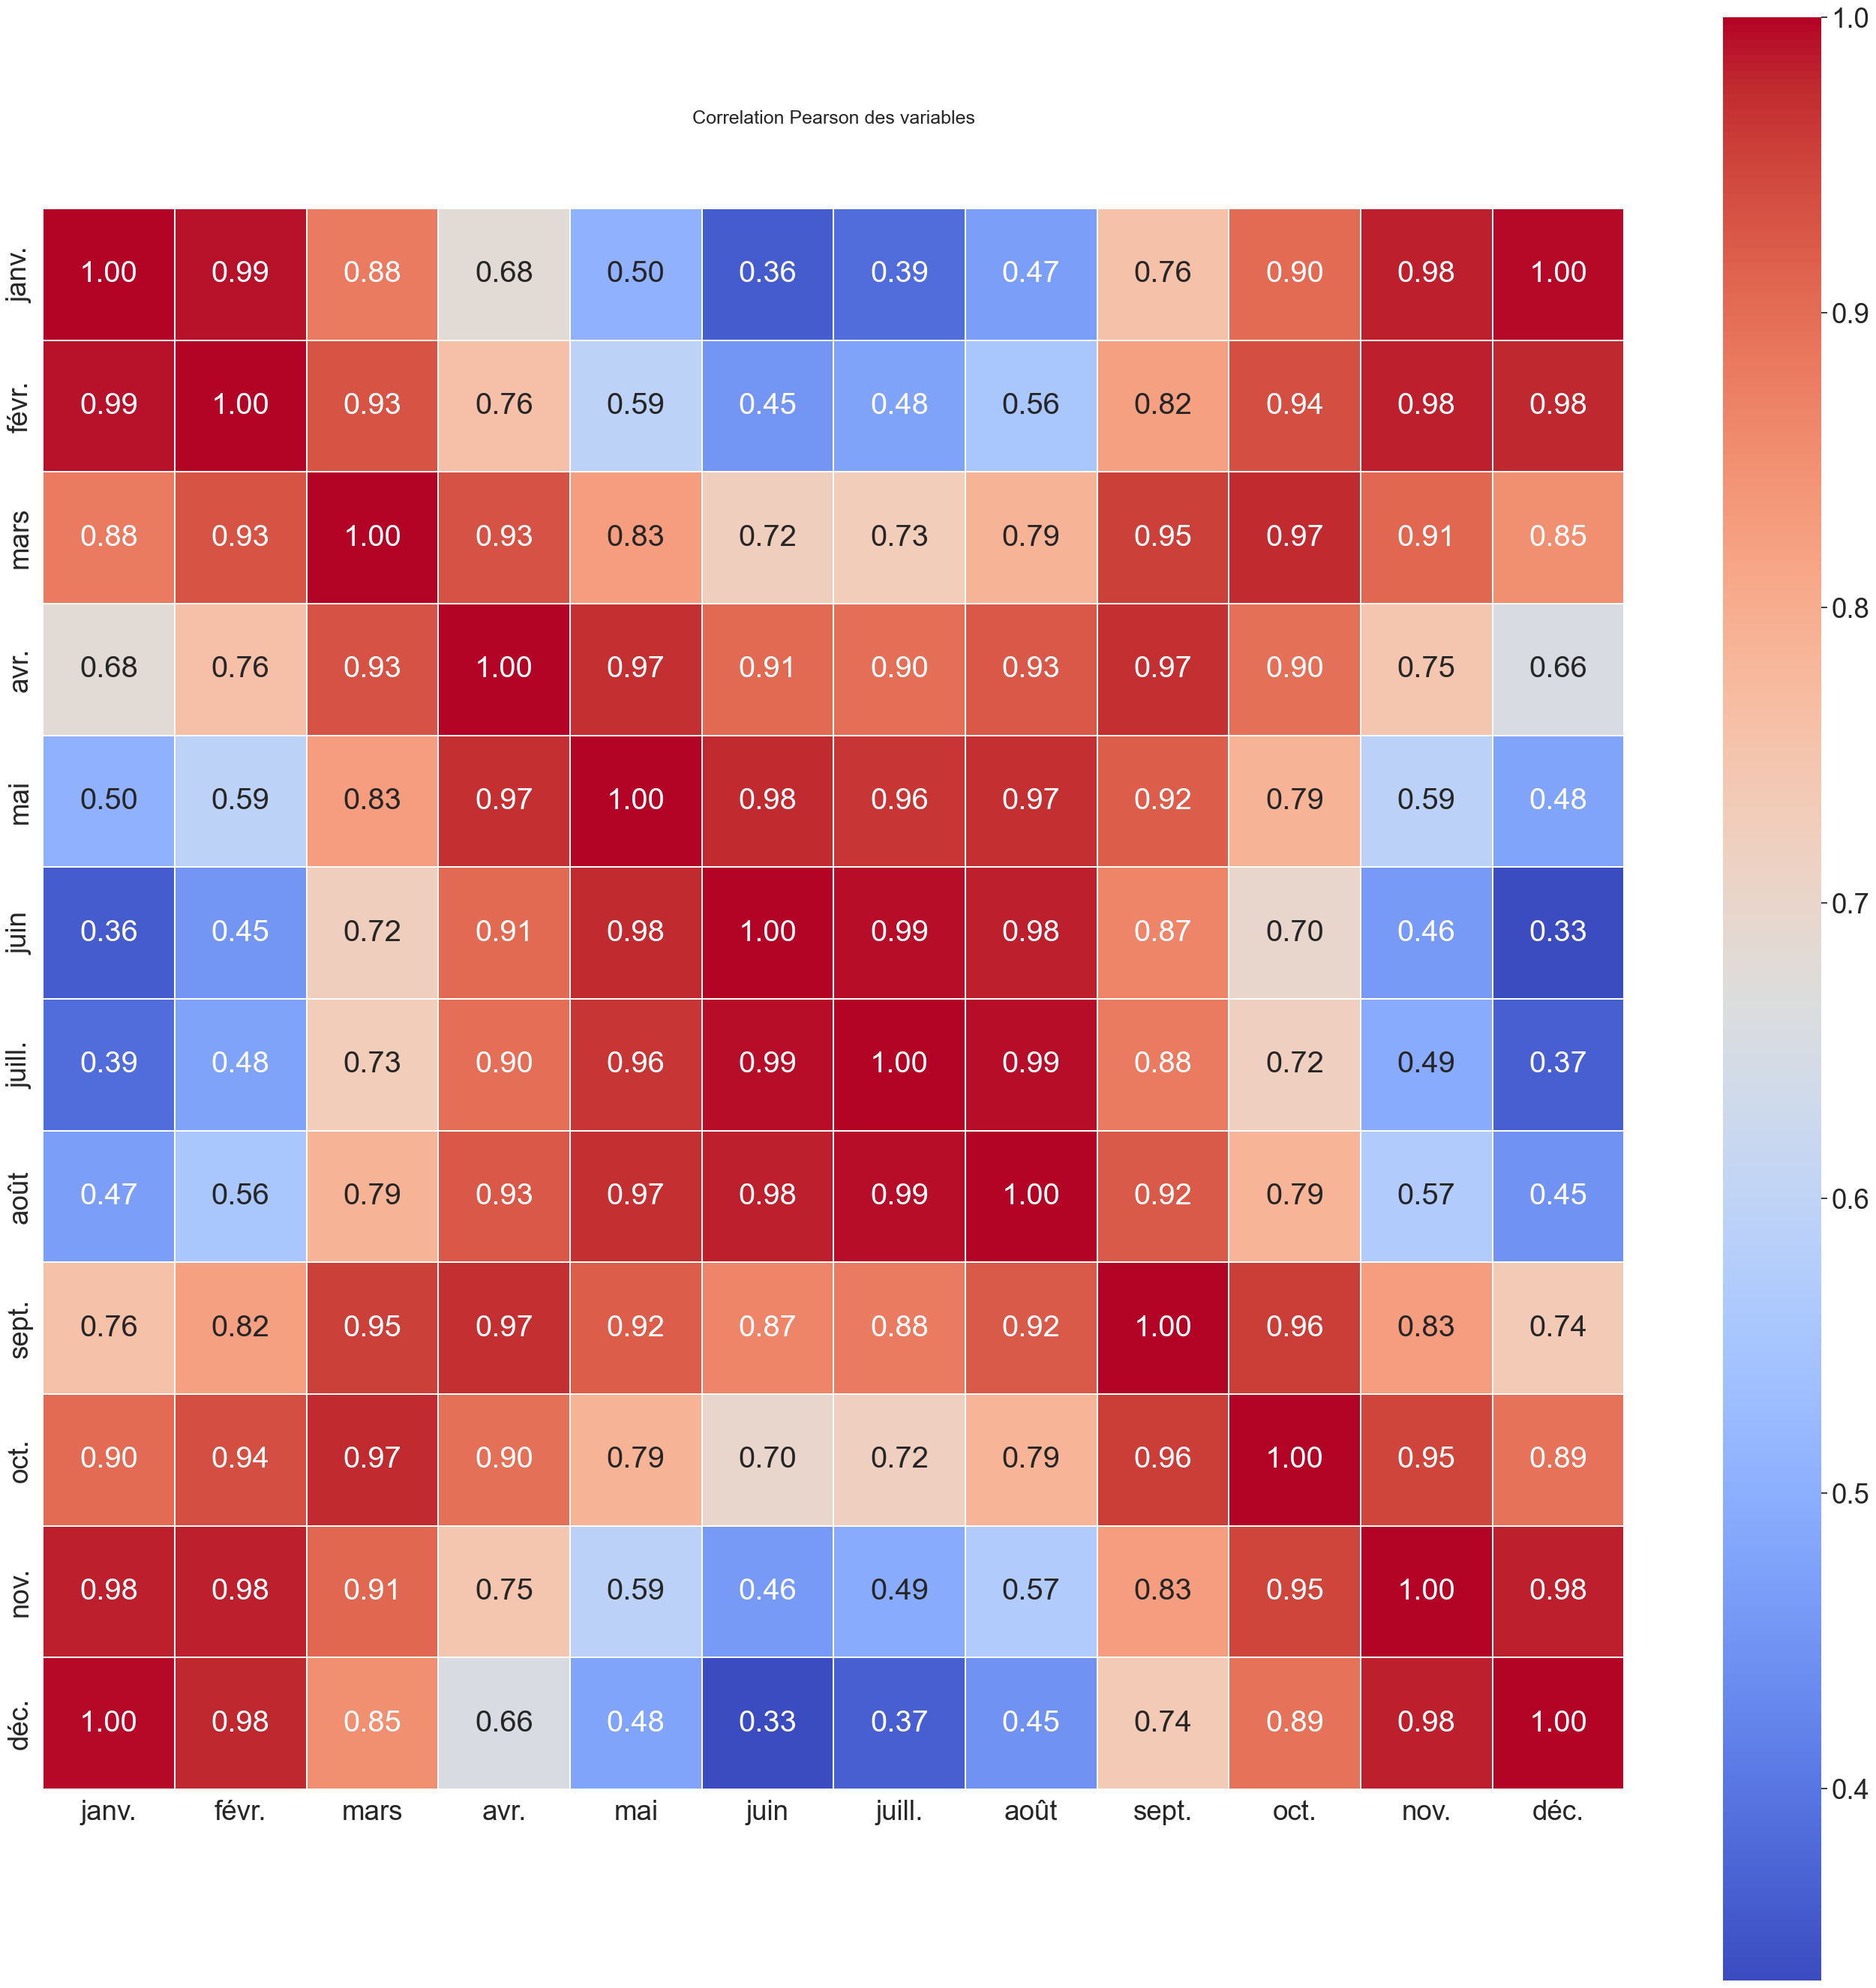

In [3]:
plt.figure(figsize=(34,34))
sns.set(font_scale=2.4)
plt.title('Correlation Pearson des variables', y=1.05, size=18)
sns.heatmap(temperatures.corr(),linewidths=0.3,vmax=1.0, fmt= '.2f', 
            square=True, cmap='coolwarm', linecolor='white', annot=True)
sns.set(font_scale=2)

In [4]:
x = temperatures
from sklearn.preprocessing import StandardScaler,MinMaxScaler
modelStd = StandardScaler()
modelStd.fit(x)
x = modelStd.transform(x)

In [5]:
modelMinMax = MinMaxScaler()
modelMinMax.fit(x)
xmin = modelMinMax.transform(x)
pd.DataFrame(xmin).head()

0         1         2         3         4         5         6   \
0  0.423068  0.433613  0.345626  0.319413  0.198113  0.139165  0.113357   
1  0.979551  0.952849  0.874931  0.893343  0.837175  0.825131  0.834391   
2  0.425669  0.430229  0.367522  0.346792  0.266461  0.256918  0.220751   
3  0.133892  0.184816  0.267136  0.432174  0.472827  0.491766  0.397004   
4  1.000000  0.970522  0.917076  0.921037  0.895714  0.893598  0.947794   

         7         8         9         10        11  
0  0.133486  0.247426  0.281954  0.362881  0.409549  
1  0.886140  0.929230  1.000000  0.994204  0.977953  
2  0.207717  0.254633  0.265836  0.339500  0.388404  
3  0.357627  0.255993  0.160012  0.132674  0.133385  
4  1.000000  0.974885  0.988778  1.000000  1.000000

In [6]:
m = temperatures.mean(axis=0)
s = temperatures.std(axis=0)
X = (temperatures - m)/s
X.head()

janv.     févr.      mars  \
Nom       Latitude  Longitude Altitude Zone                                 
Abbeville 50.136000 1.834000  69       NO   -0.402850 -0.470028 -0.836212   
Ajaccio   41.918000 8.792667  5        SE    1.615428  1.574056  1.373008   
Alencon   48.445500 0.110167  143      NO   -0.393417 -0.483347 -0.744820   
Bale      47.614333 7.510000  263      NE   -1.451649 -1.449470 -1.163812   
Bastia    42.540667 9.485167  10       SE    1.689594  1.643629  1.548913   

                                                 avr.       mai      juin  \
Nom       Latitude  Longitude Altitude Zone                                 
Abbeville 50.136000 1.834000  69       NO   -0.981111 -1.089313 -1.264283   
Ajaccio   41.918000 8.792667  5        SE    1.431647  1.406339  1.362684   
Alencon   48.445500 0.110167  143      NO   -0.866012 -0.822399 -0.813337   
Bale      47.614333 7.510000  263      NE   -0.507072 -0.016504  0.086031   
Bastia    42.540667 9.485167  10       SE    1.548070  1.634944  1.624881   

                                               juill.      août     sept.  \
Nom       Latitude  Longitude Altitude Zone                                 
Abbeville 50.136000 1.834000  69       NO   -1.188230 -1.109141 -0.921331   
Ajaccio   41.918000 8.792667  5        SE    1.441472  1.563684  1.806091   
Alencon   48.445500 0.110167  143      NO   -0.796551 -0.845531 -0.892502   
Bale      47.614333 7.510000  263      NE   -0.153733 -0.313171 -0.887060   
Bastia    42.540667 9.485167  10       SE    1.855065  1.968022  1.988725   

                                                 oct.      nov.      déc.  
Nom       Latitude  Longitude Altitude Zone                                
Abbeville 50.136000 1.834000  69       NO   -0.751445 -0.456246 -0.387122  
Ajaccio   41.918000 8.792667  5        SE    1.949668  1.937547  1.711188  
Alencon   48.445500 0.110167  143      NO   -0.812076 -0.544901 -0.465180  
Bale      47.614333 7.510000  263      NE   -1.210163 -1.329124 -1.406604  
Bastia    42.540667 9.485167  10       SE    1.907452  1.959522  1.792577

In [7]:
pd.DataFrame(x, index=temperatures.index, columns=temperatures.columns)

janv.     févr.  \
Nom              Latitude  Longitude Altitude Zone                       
Abbeville        50.136000  1.834000 69       NO   -0.407734 -0.475726   
Ajaccio          41.918000  8.792667 5        SE    1.635010  1.593136   
Alencon          48.445500  0.110167 143      NO   -0.398186 -0.489206   
Bale             47.614333  7.510000 263      NE   -1.469245 -1.467040   
Bastia           42.540667  9.485167 10       SE    1.710075  1.663552   
Belle Ile        47.294333 -3.218333 34       NO    1.315417  1.067915   
Bordeaux         44.830667 -0.691333 47       SO    0.624185  0.767943   
Bourges          47.059167  2.359833 161      NO   -0.502848 -0.495228   
Brest            48.444167 -4.412000 94       NO    0.790867  0.605625   
Caen             49.180000 -0.456167 67       NO    0.057934 -0.007097   
Cap Cepet        43.079333  5.940833 115      SE    1.703519  1.615470   
Clermont-Fd      45.786833  3.149333 331      SE   -0.574864 -0.509102   
Dijon            47.267833  5.088333 219      NE   -1.253399 -1.178874   
Embrun           44.565667  6.502333 871      SE   -1.837977 -1.661189   
Gourdon          44.745000  1.396667 260      SO   -0.140868 -0.030321   
Le Puy           45.074500  3.764000 833      SE   -1.960738 -2.203425   
Lille            50.570000  3.097500 47       NE   -0.619950 -0.608421   
Limoges          45.861167  1.175000 402      SO   -0.538165 -0.604676   
Lyon             45.726500  5.077833 235      SE   -0.753967 -0.593395   
Marignane        43.437667  5.216000 9        SE    0.901236  1.017396   
Millau           44.118500  3.019500 712      SE   -1.079337 -1.198912   
Mont-De-Marsan   43.909833 -0.500167 59       SO    0.298450  0.432059   
Montelimar       44.581167  4.733000 73       SE    0.000984  0.198167   
Montpellier      43.577000  3.963167 2        SE    0.932437  1.115353   
Nancy            48.581000  5.959833 336      NE   -1.506801 -1.459854   
Nantes           47.150000 -1.608833 26       NO    0.367141  0.332308   
Nice             43.648833  7.209000 2        SE    1.529091  1.781005   
Orly             48.716833  2.384333 89       NO   -0.394556 -0.398962   
Perpignan        42.737167  2.872833 42       SE    1.523143  1.624479   
Ploumanac'H      48.825833 -3.473167 55       NO    1.162893  0.937697   
Poitiers         46.593833  0.314333 123      NO   -0.169663 -0.243064   
Pte De Chassiron 46.046833 -1.411500 11       SO    1.069609  0.987966   
Pte De La Hague  49.725167 -1.939833 6        NO    1.199644  0.894453   
Reims            49.209667  4.155333 95       NE   -0.710756 -0.896741   
Rennes           48.068833 -1.734000 36       NO    0.279710  0.214314   
Rouen            49.383000  1.181667 151      NO   -0.566386 -0.644367   
St Girons        43.005333  1.106833 414      SO   -0.194941 -0.033391   
Strasbourg       48.549500  7.640333 150      NE   -1.344435 -1.258956   
Tarbes           43.188000  0.000000 360      SO   -0.002230  0.135875   
Toulouse         43.621000  1.378833 151      SO    0.326011  0.532836   
Tours            47.444500  0.727333 108      NO   -0.223036 -0.222781   
Troyes           48.324667  4.020000 112      NE   -0.777274 -0.836821   

                                                        mars      avr.  \
Nom              Latitude  Longitude Altitude Zone                       
Abbeville        50.136000  1.834000 69       NO   -0.846348 -0.993004   
Ajaccio          41.918000  8.792667 5        SE    1.389651  1.449000   
Alencon          48.445500  0.110167 143      NO   -0.753849 -0.876509   
Bale             47.614333  7.510000 263      NE   -1.177919 -0.513218   
Bastia           42.540667  9.485167 10       SE    1.567688  1.566836   
Belle Ile        47.294333 -3.218333 34       NO    0.432219 -0.095997   
Bordeaux         44.830667 -0.691333 47       SO    1.025379  0.996127   
Bourges          47.059167  2.359833 161      NO   -0.262657 -0.119960   
Brest            48.444167 -4.412000 94       NO   -0.1411

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)

In [9]:
from sklearn.decomposition import PCA
pca = PCA()

In [10]:
model = pca.fit(x)

# Le pourcentage d'inertie associée à chaque dimension

In [11]:
pca.explained_variance_ratio_

array([8.04243857e-01, 1.82543165e-01, 7.66310425e-03, 3.03790601e-03,
       1.24916590e-03, 3.89653241e-04, 3.80461064e-04, 2.25130725e-04,
       1.13144640e-04, 8.00279045e-05, 4.66514999e-05, 2.77331853e-05])

In [12]:
pca.explained_variance_ratio_.cumsum()*100

array([ 80.42438565,  98.67870216,  99.44501258,  99.74880318,
        99.87371977,  99.9126851 ,  99.9507312 ,  99.97324428,
        99.98455874,  99.99256153,  99.99722668, 100.        ])

In [13]:
sum(pca.explained_variance_ratio_.cumsum()*100 <= 95) + 1

2

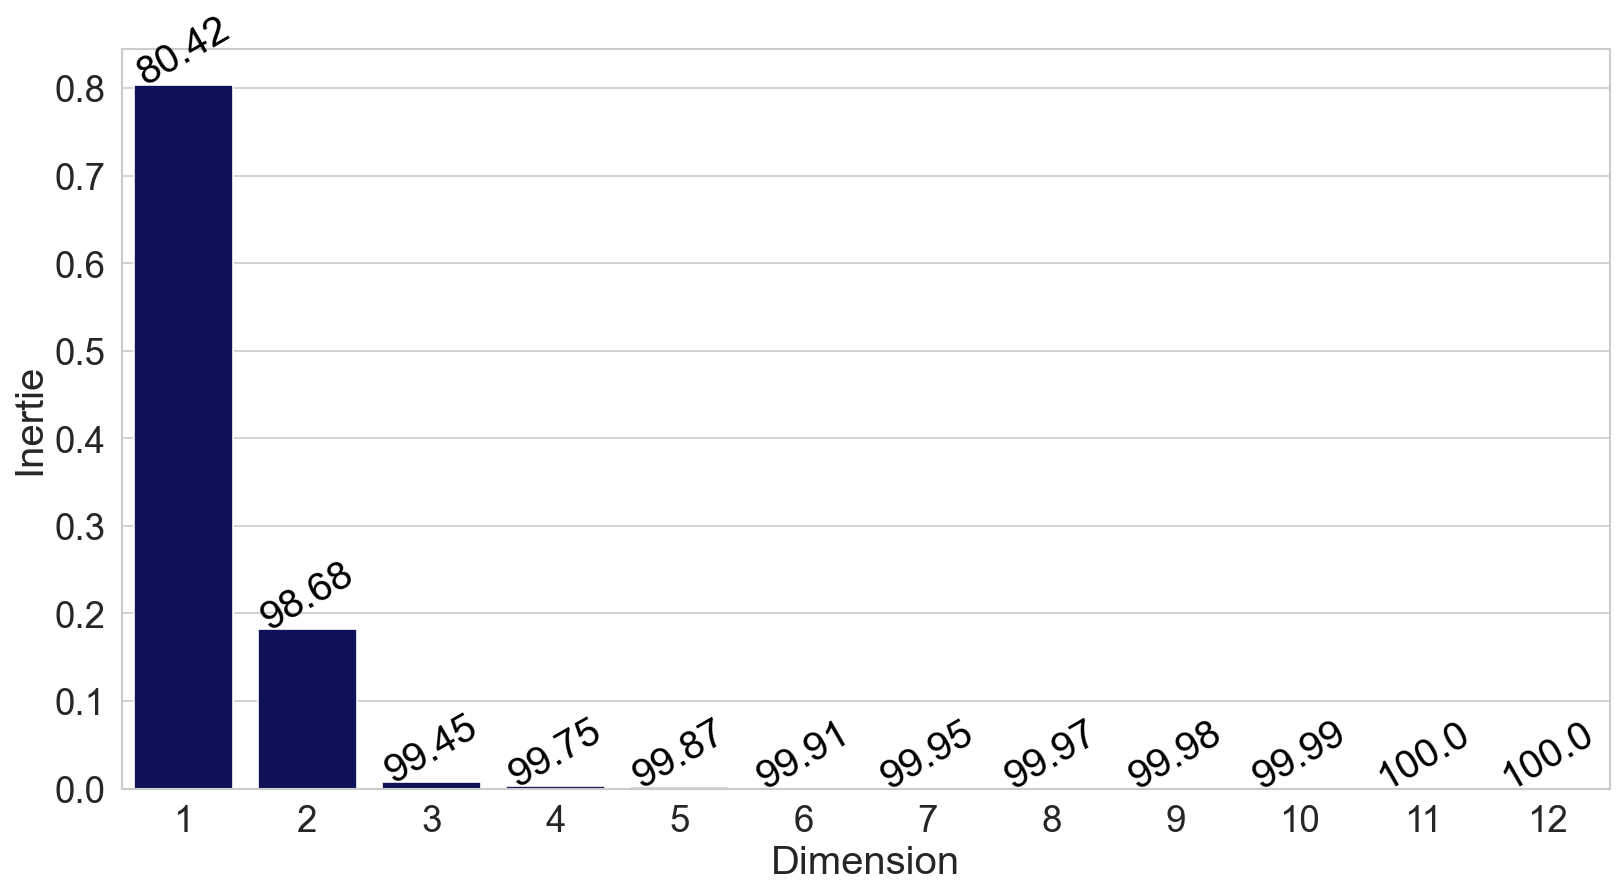

In [14]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font1 = fm.FontProperties(size=24)

inertie = pd.DataFrame(pca.explained_variance_ratio_,columns=['Inertie']) 
inertie['label'] = np.round(pca.explained_variance_ratio_.cumsum()*100,2)
inertie['Dimension'] = range(1,len(pca.explained_variance_)+1)

plt.figure(figsize=(16,8),dpi=120)
sns.set_style("whitegrid")
g = sns.barplot(x="Dimension",y='Inertie', data=inertie, color="#030764")

for index, row in inertie.iterrows():
    g.text(row.name,row.Inertie, row.label, color='black', ha="center", rotation=30)
    
plt.xlabel('Dimension', fontproperties=font1)
plt.ylabel('Inertie', fontproperties=font1)

plt.show()

plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)

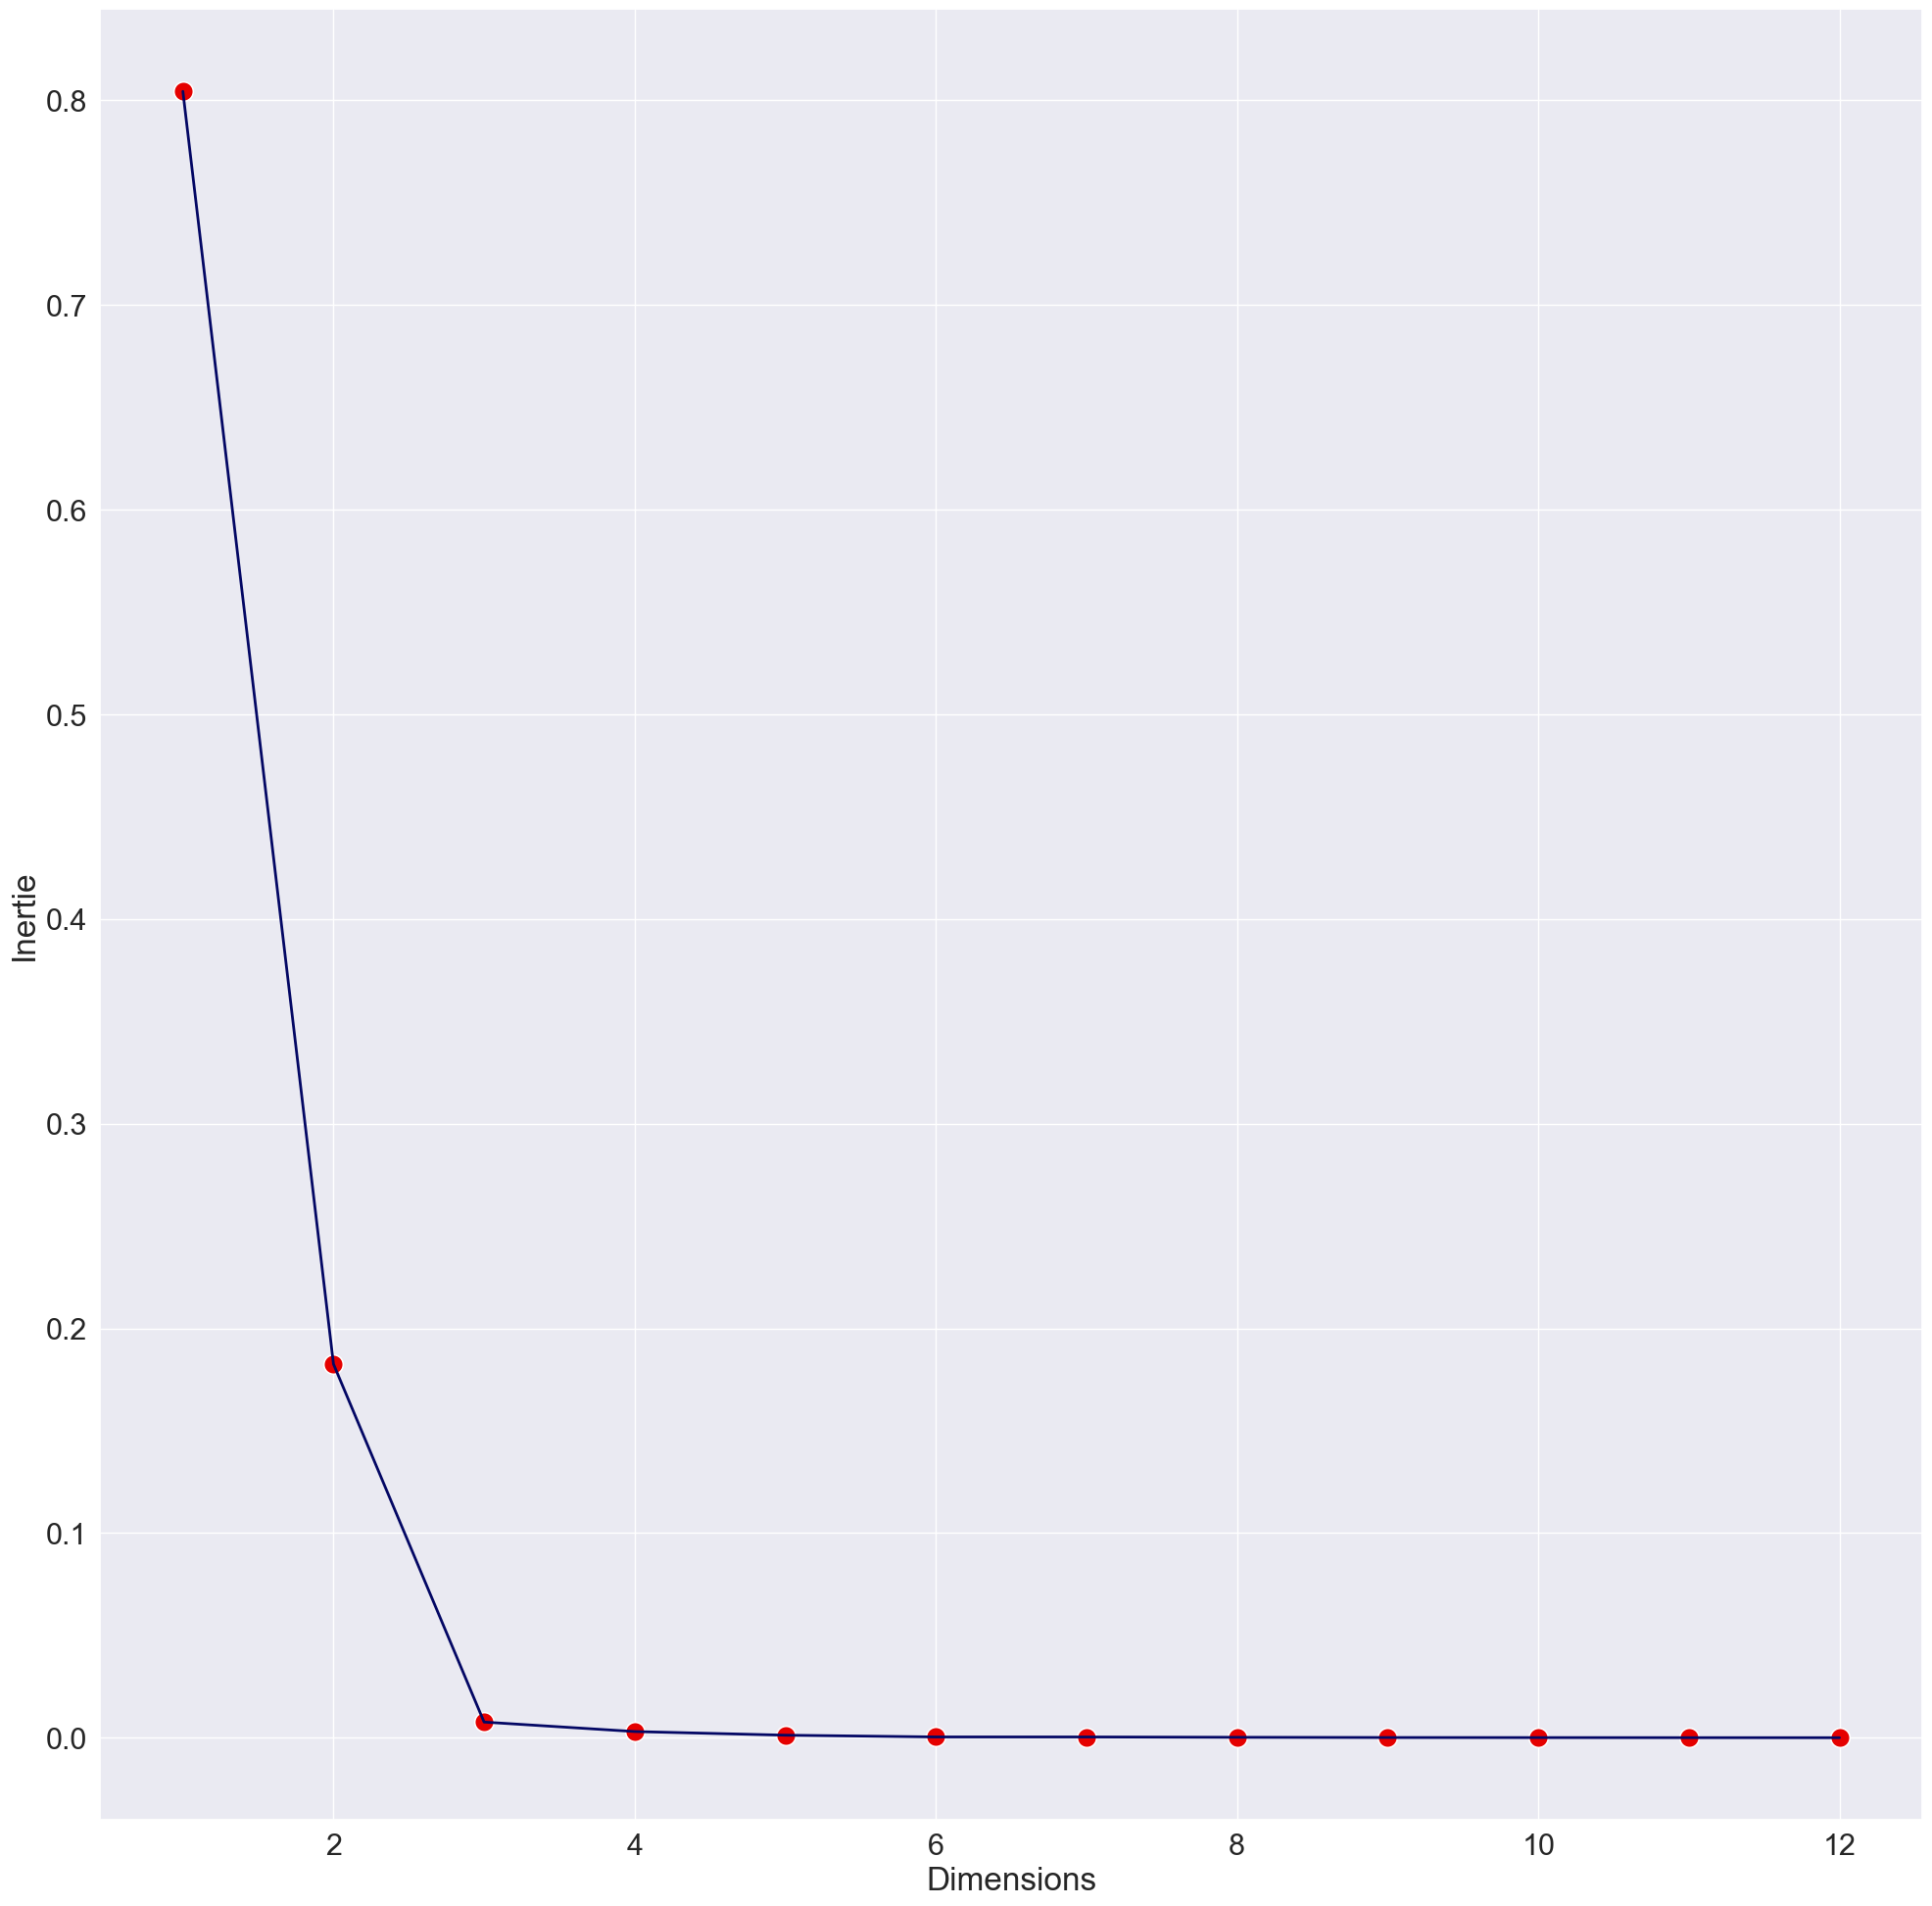

In [15]:
fig, ax = plt.subplots(figsize=(24,24));
graph = sns.lineplot( x='Dimension',
                      y='Inertie',
                      data=inertie,
                      estimator = None, 
                      lw        = 2, 
                      ci        = None,
                      color     = "#030764");
sns.scatterplot(x     = 'Dimension',
                y     = 'Inertie',
                data  = inertie,
                s     = 200,
                ci    = None, 
                color = "#e50000",
                ax    = graph);

ax.set_xlabel('Dimensions');
ax.set_ylabel('Inertie');

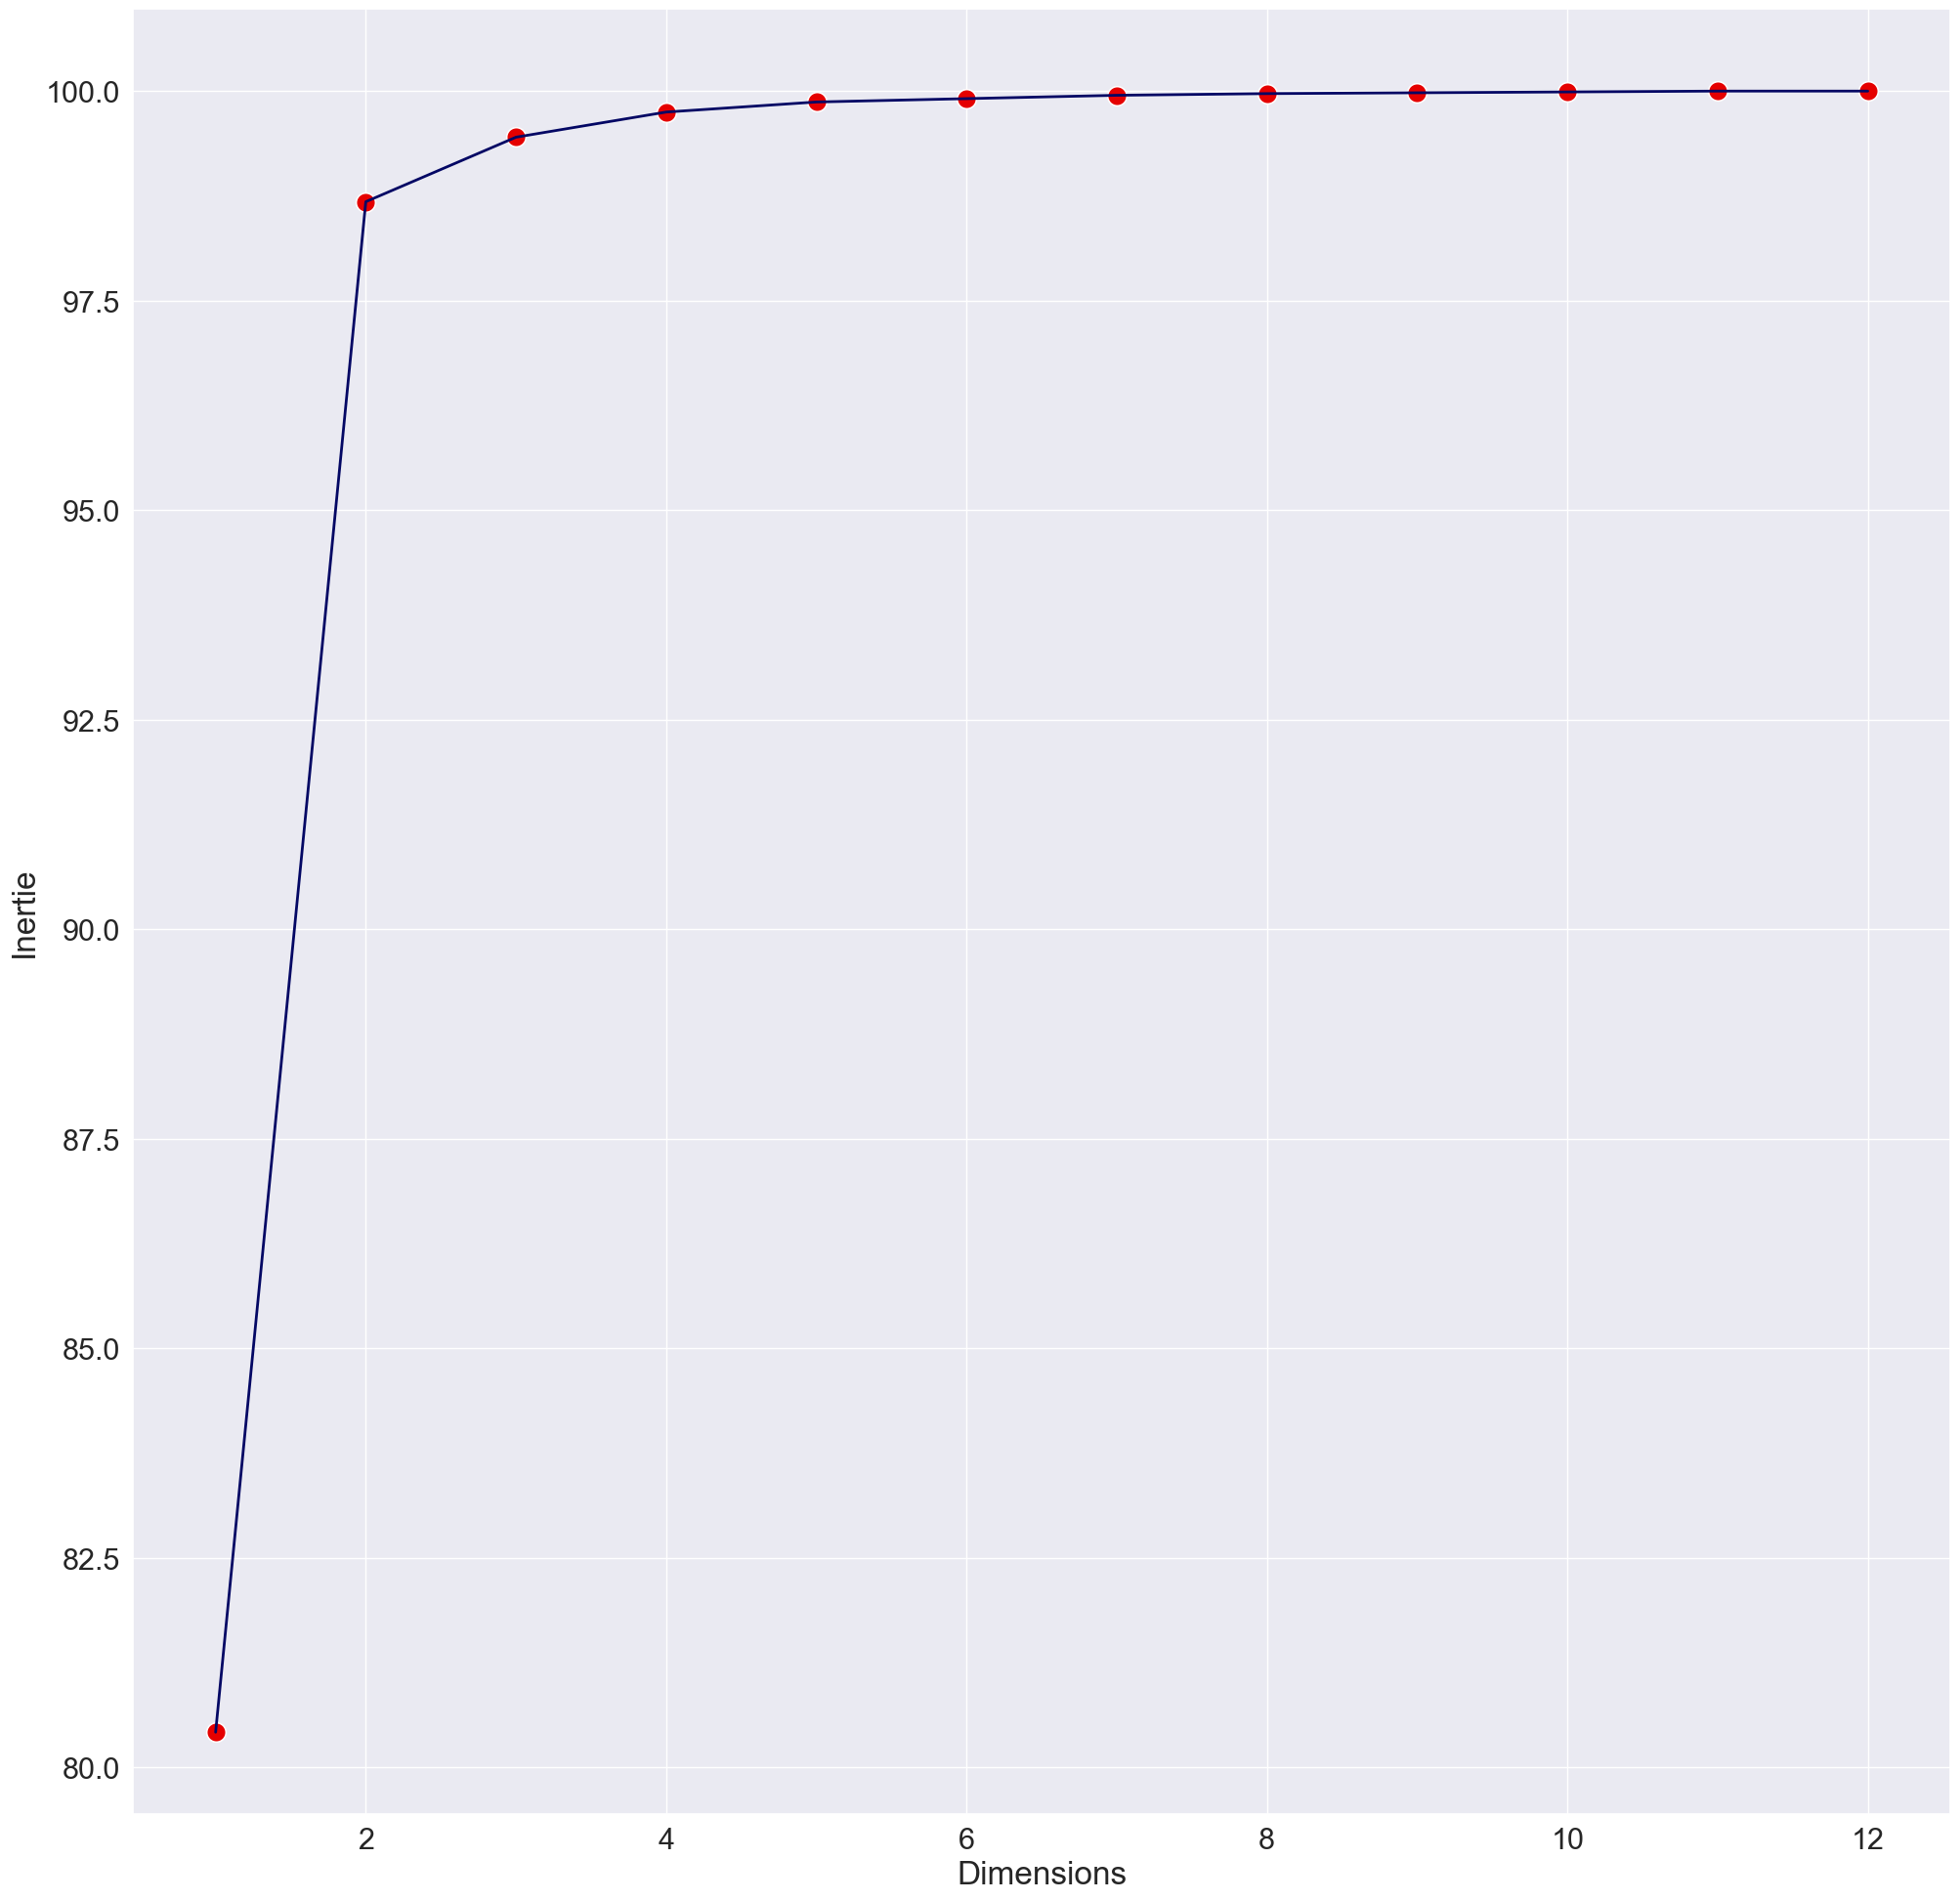

In [16]:
fig, ax = plt.subplots(figsize=(24,24));
graph = sns.lineplot( x='Dimension',
                      y='label',
                      data=inertie,
                      estimator = None, 
                      lw        = 2, 
                      ci        = None,
                      color     = "#030764");
sns.scatterplot(x     = 'Dimension',
                y     = 'label',
                data  = inertie,
                s     = 200,
                ci    = None, 
                color = "#e50000",
                ax    = graph);

ax.set_xlabel('Dimensions');
ax.set_ylabel('Inertie');

# L'influence des variables dans les nouvelles dimensions

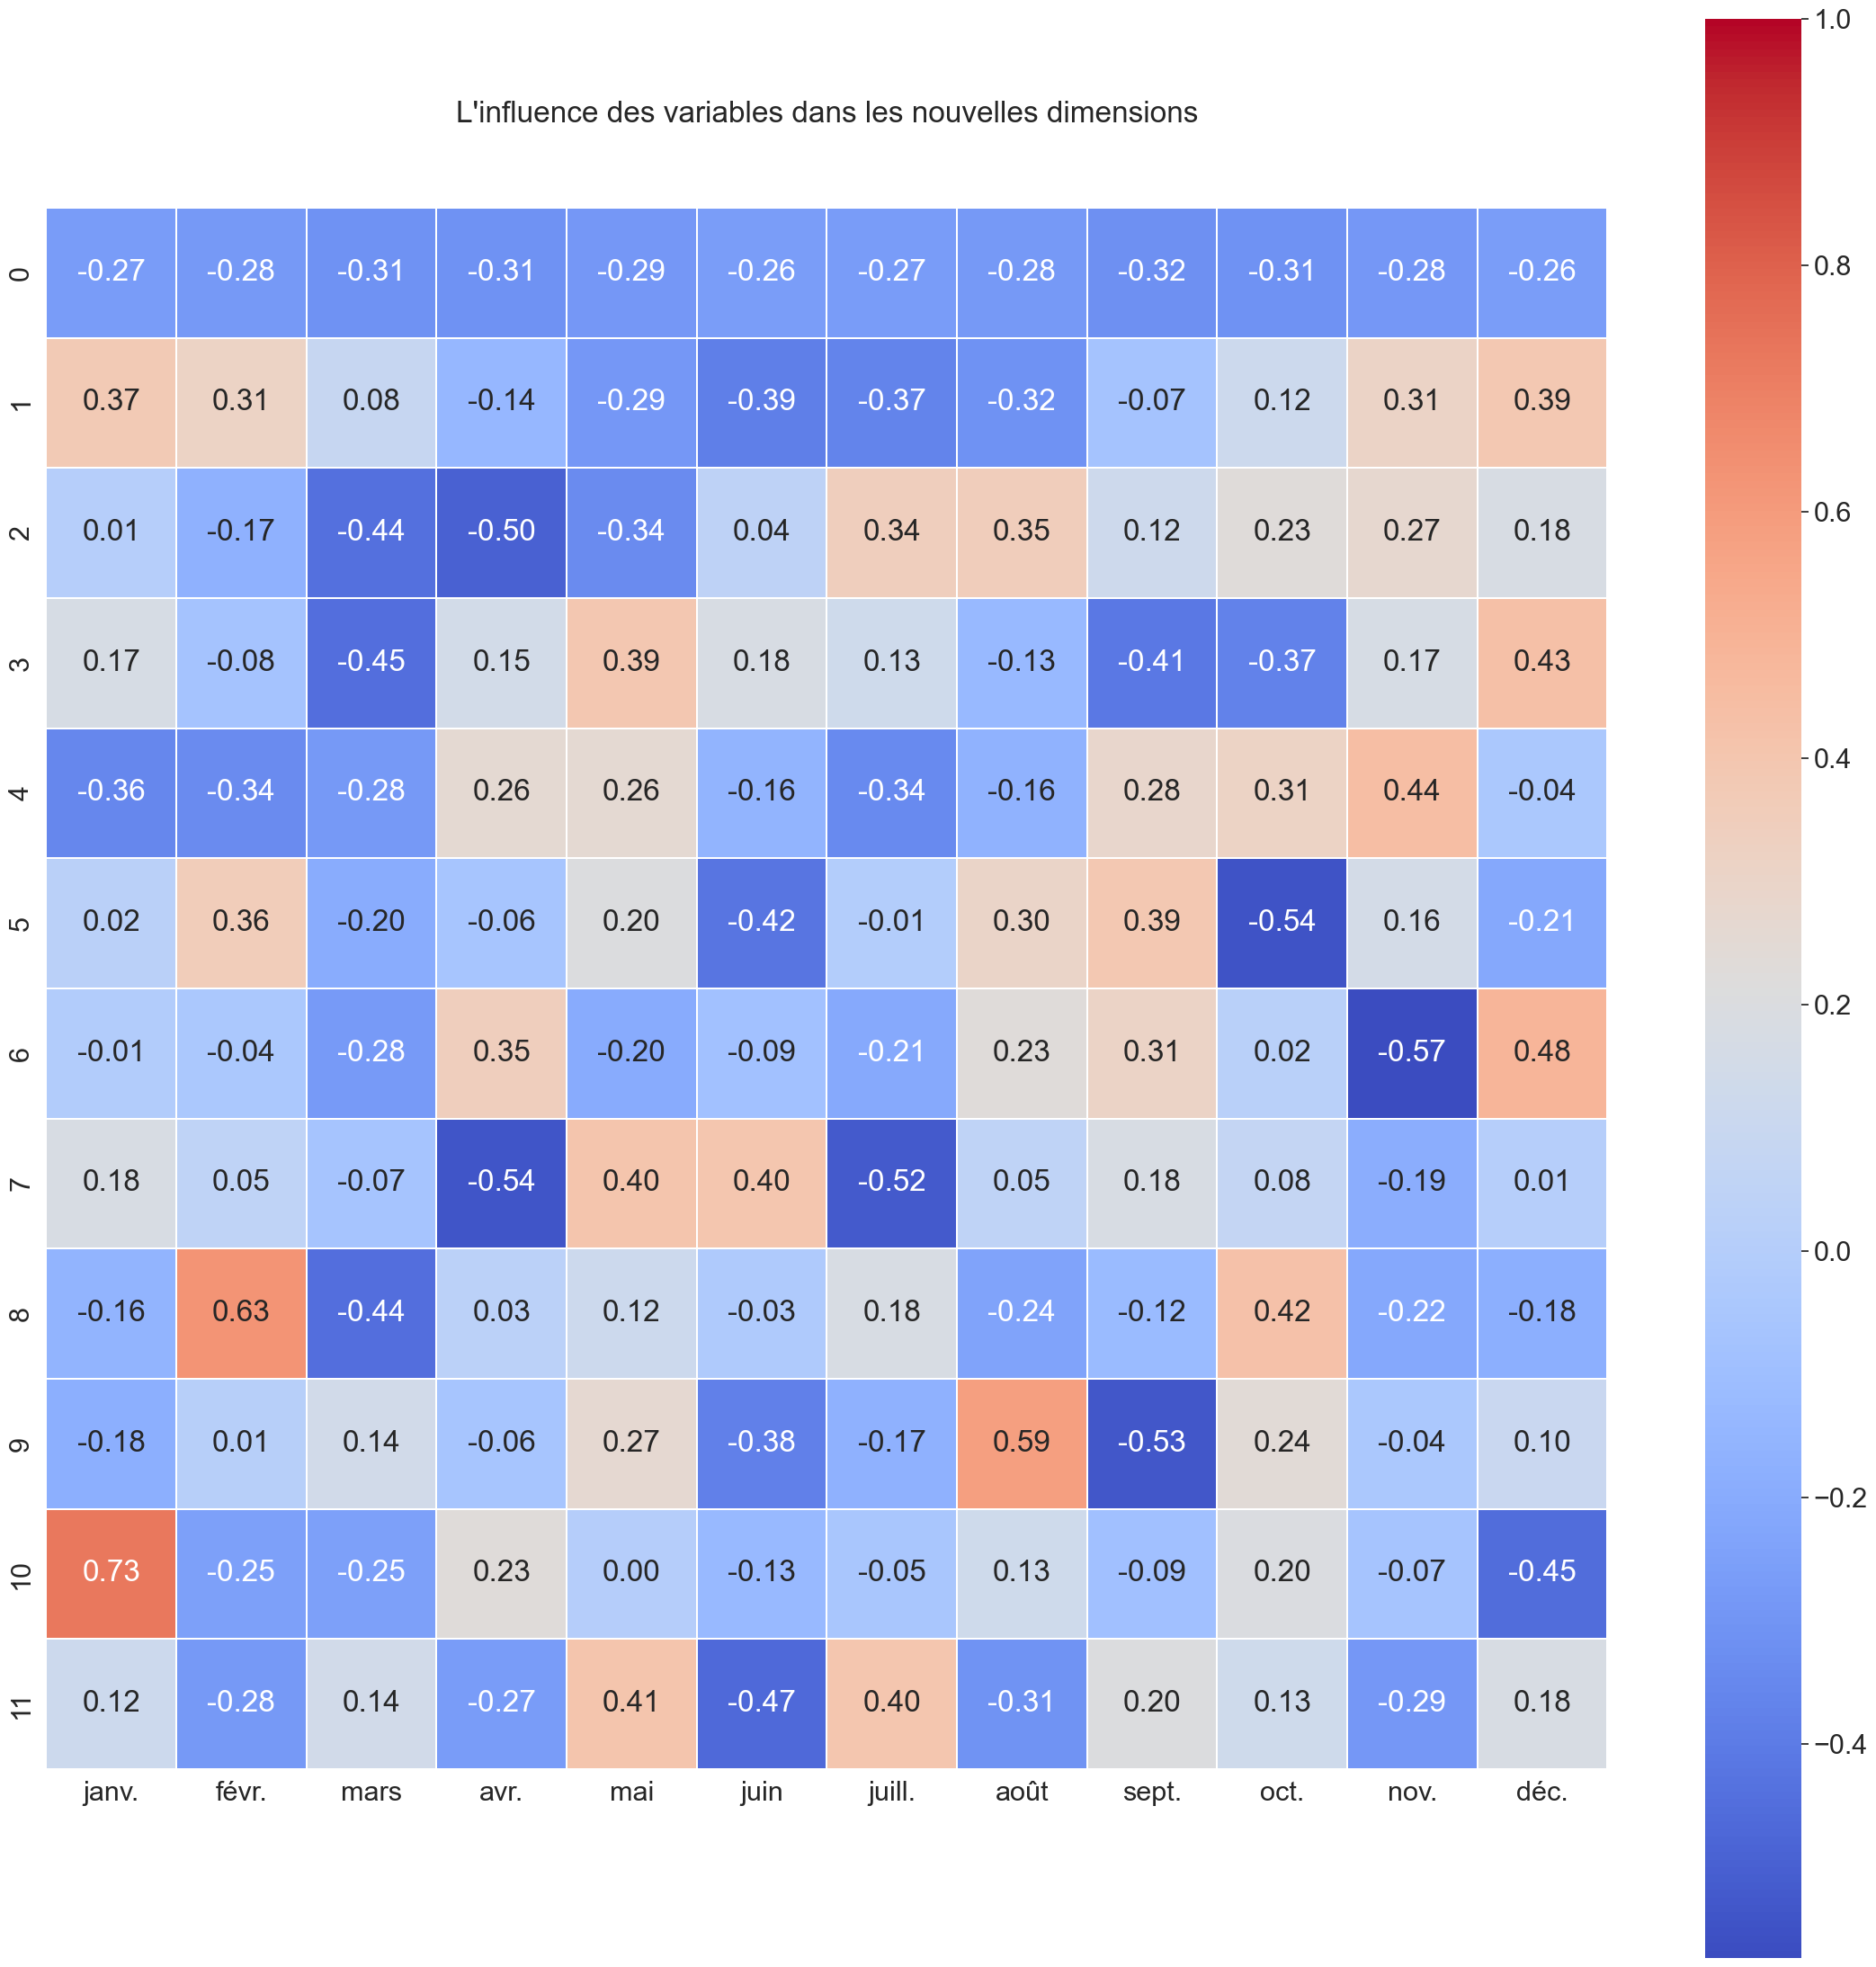

In [17]:
plt.figure(figsize=(28,28))
sns.set(font_scale=2)
plt.title("L'influence des variables dans les nouvelles dimensions", y=1.05, size=24)
sns.heatmap(pd.DataFrame(pca.components_, columns=X.columns),
            fmt= '.2f',linewidths=0.3,vmax=1.0, 
            square=True, cmap='coolwarm', linecolor='white', annot=True);

In [18]:
n_components = sum(pca.explained_variance_ratio_.cumsum() < .95 ) + 1 
from sklearn.decomposition import PCA
modelPCA = PCA(n_components=n_components)
x_proj = modelPCA.fit_transform(x)
donnees2d = pd.DataFrame(x_proj, index=temperatures.index, columns=[f'Dim{i+1:02d}' for i in range(n_components)])

In [19]:
n_components=3
modelPCA = PCA(n_components=n_components)
x_proj = modelPCA.fit_transform(x)
donnees3d = pd.DataFrame(x_proj, index=temperatures.index, columns=[f'Dim{i+1:02d}' for i in range(n_components)])

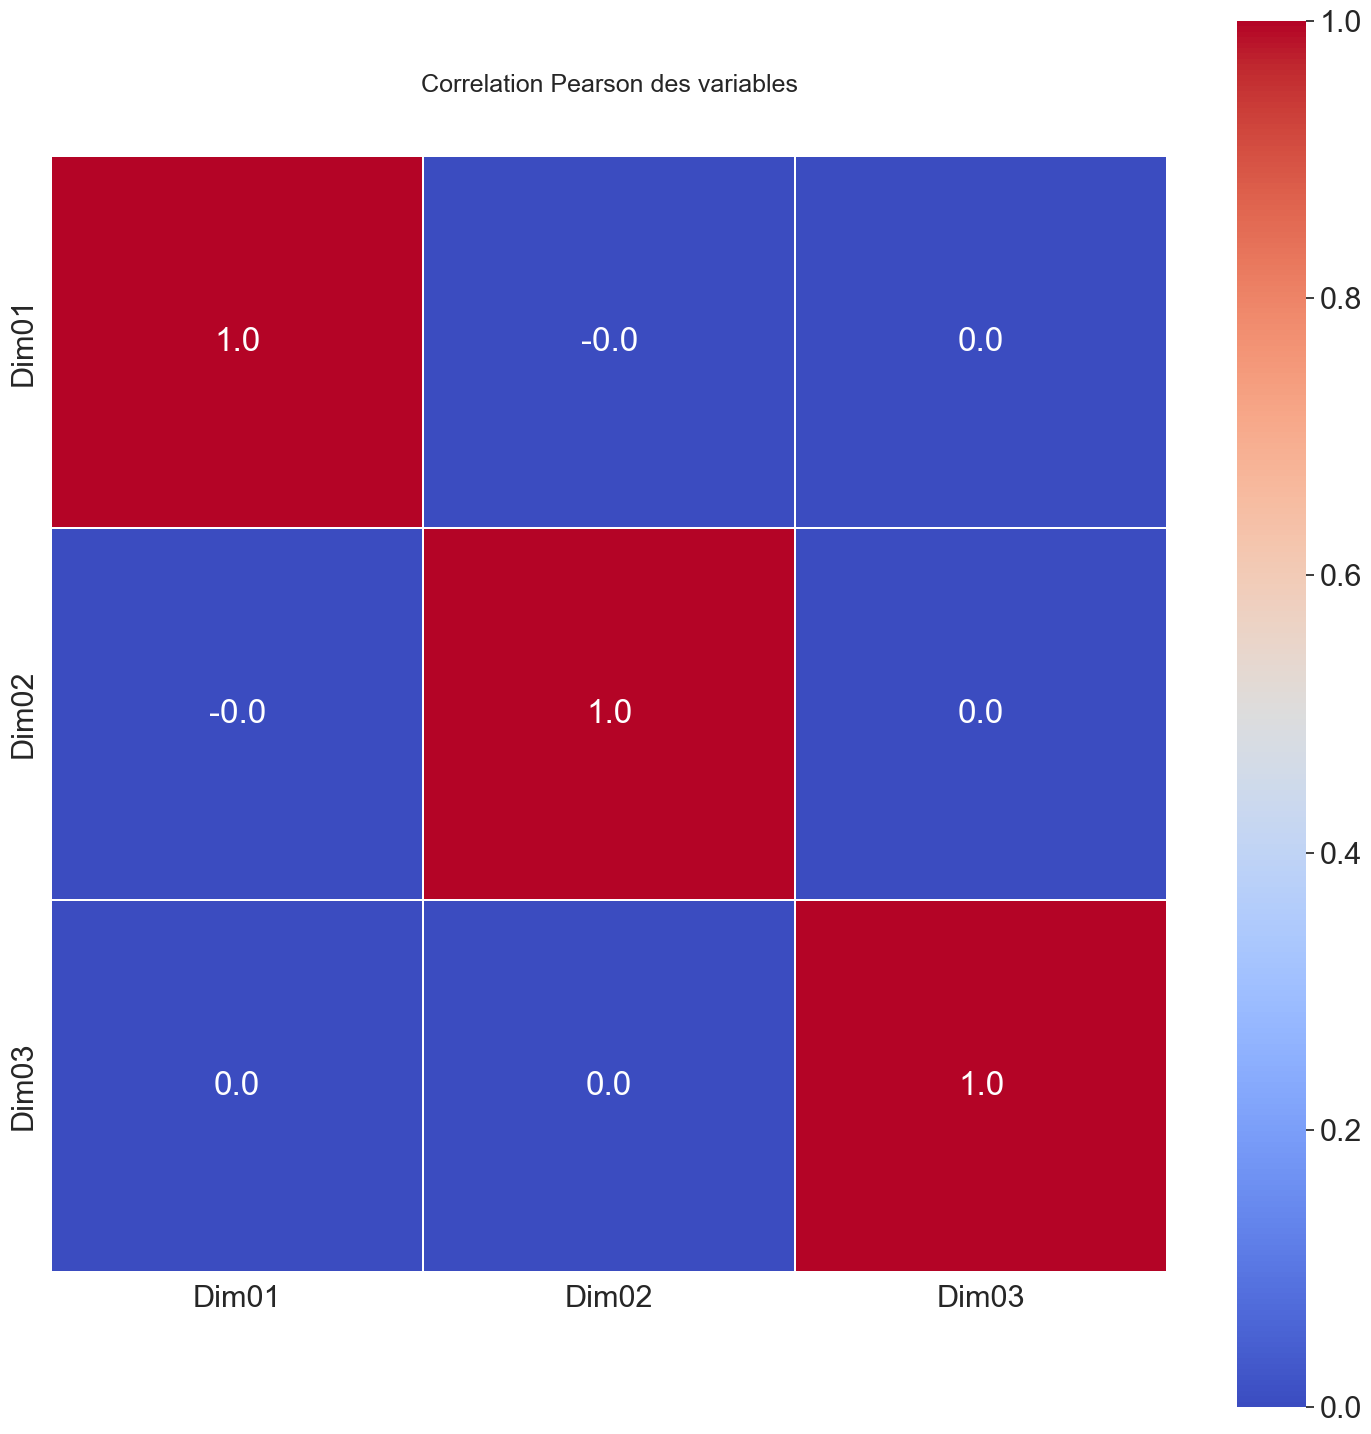

In [20]:
plt.figure(figsize=(18,18))
plt.title('Correlation Pearson des variables', y=1.05, size=18)
sns.heatmap(donnees3d.corr(),linewidths=0.3,vmax=1.0, fmt= '.1f', 
            square=True, cmap='coolwarm', linecolor='white', annot=True);

In [21]:
donnees3d.head()

Dim01     Dim02     Dim03
Nom       Latitude  Longitude Altitude Zone                              
Abbeville 50.136000 1.834000  69       NO    2.879743  1.071171 -0.024267
Ajaccio   41.918000 8.792667  5        SE   -5.598592  0.401231  0.559796
Alencon   48.445500 0.110167  143      NO    2.493413  0.507866 -0.013326
Bale      47.614333 7.510000  263      NE    2.879361 -1.947294 -0.157333
Bastia    42.540667 9.485167  10       SE   -6.167923  0.015735  0.663955

In [22]:
import plotly.express as px
import plotly.graph_objs as go

layout = go.Layout({"showlegend": False})

fig = px.scatter_3d(donnees3d.reset_index(), 
                    x='Dim01', 
                    y='Dim02', 
                    z='Dim03',
                    color='Zone',
#                     size=100+donnees3d.reset_index().Altitude,
#                     symbol=donnees.CD23.cat.codes,
                    text='Nom',
                    width=1024,
                    height=1024,
                   )

fig.show()

In [23]:
import plotly.express as px
import plotly.graph_objs as go

fig = px.scatter(donnees2d.reset_index(), 
                    x='Dim01', 
                    y='Dim02', 
#                     z='Dim03',
                    color='Zone',
#                     size=100+donnees3d.reset_index().Altitude,
#                     symbol=donnees.CD23.cat.codes,
                    text='Nom',
                    width=996,
                    height=512,
                   )

fig.show()

# Classification hiérarchique ascendante

In [24]:
Villes = donnees2d.reset_index().Nom.values
donnees2d.head()

Dim01     Dim02
Nom       Latitude  Longitude Altitude Zone                    
Abbeville 50.136000 1.834000  69       NO    2.879743  1.071171
Ajaccio   41.918000 8.792667  5        SE   -5.598592  0.401231
Alencon   48.445500 0.110167  143      NO    2.493413  0.507866
Bale      47.614333 7.510000  263      NE    2.879361 -1.947294
Bastia    42.540667 9.485167  10       SE   -6.167923  0.015735

## Calcul des arbres 

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(donnees2d, 'ward')

## Affichage des arbres

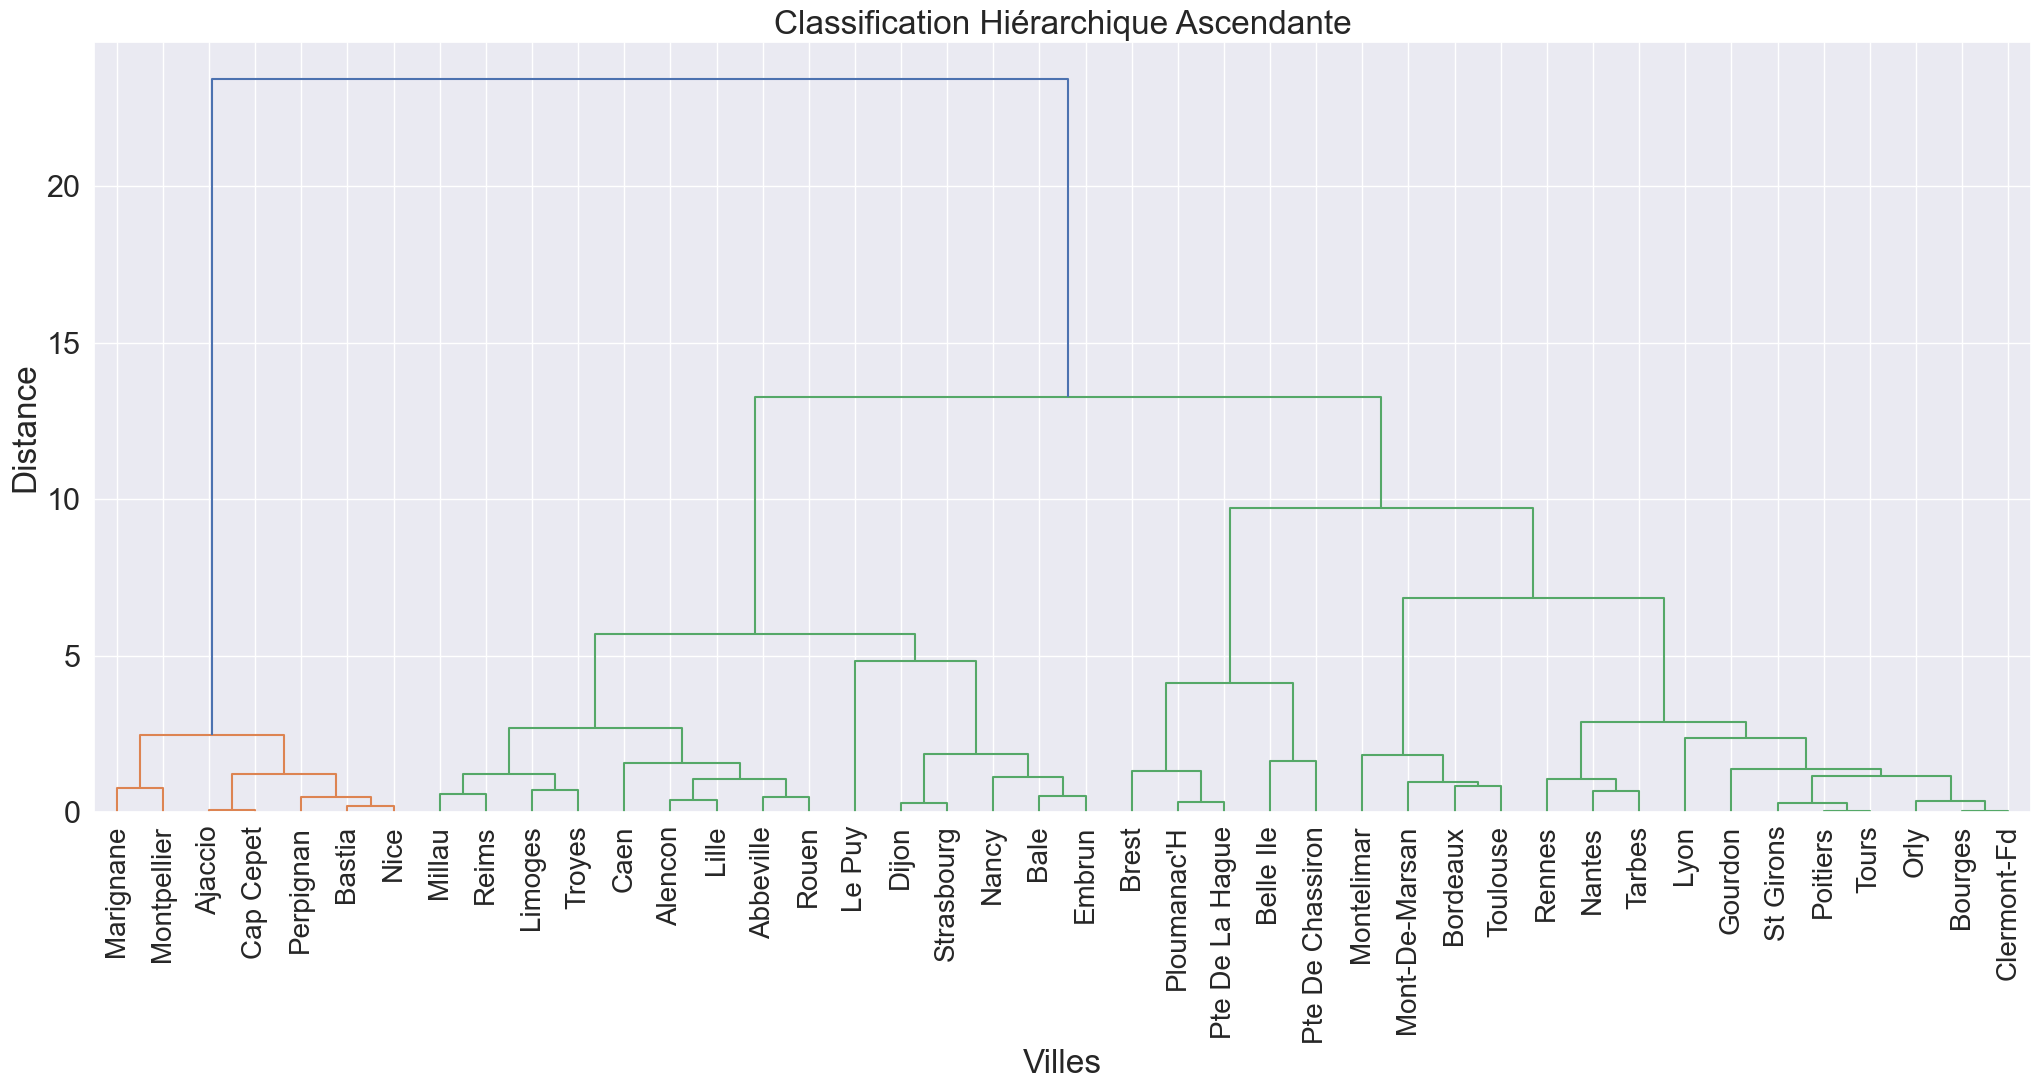

In [26]:
plt.figure(figsize=(25, 10))
plt.title('Classification Hiérarchique Ascendante')
plt.xlabel('Villes')
plt.ylabel('Distance')
dendrogram( Z,leaf_rotation=90.,leaf_font_size=20.,
           labels = Villes)
plt.show()

In [27]:
def afficheDendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Classification Hiérarchique Ascendante')
        plt.xlabel('Villes ou (taille du cluster)')
        plt.ylabel('Distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

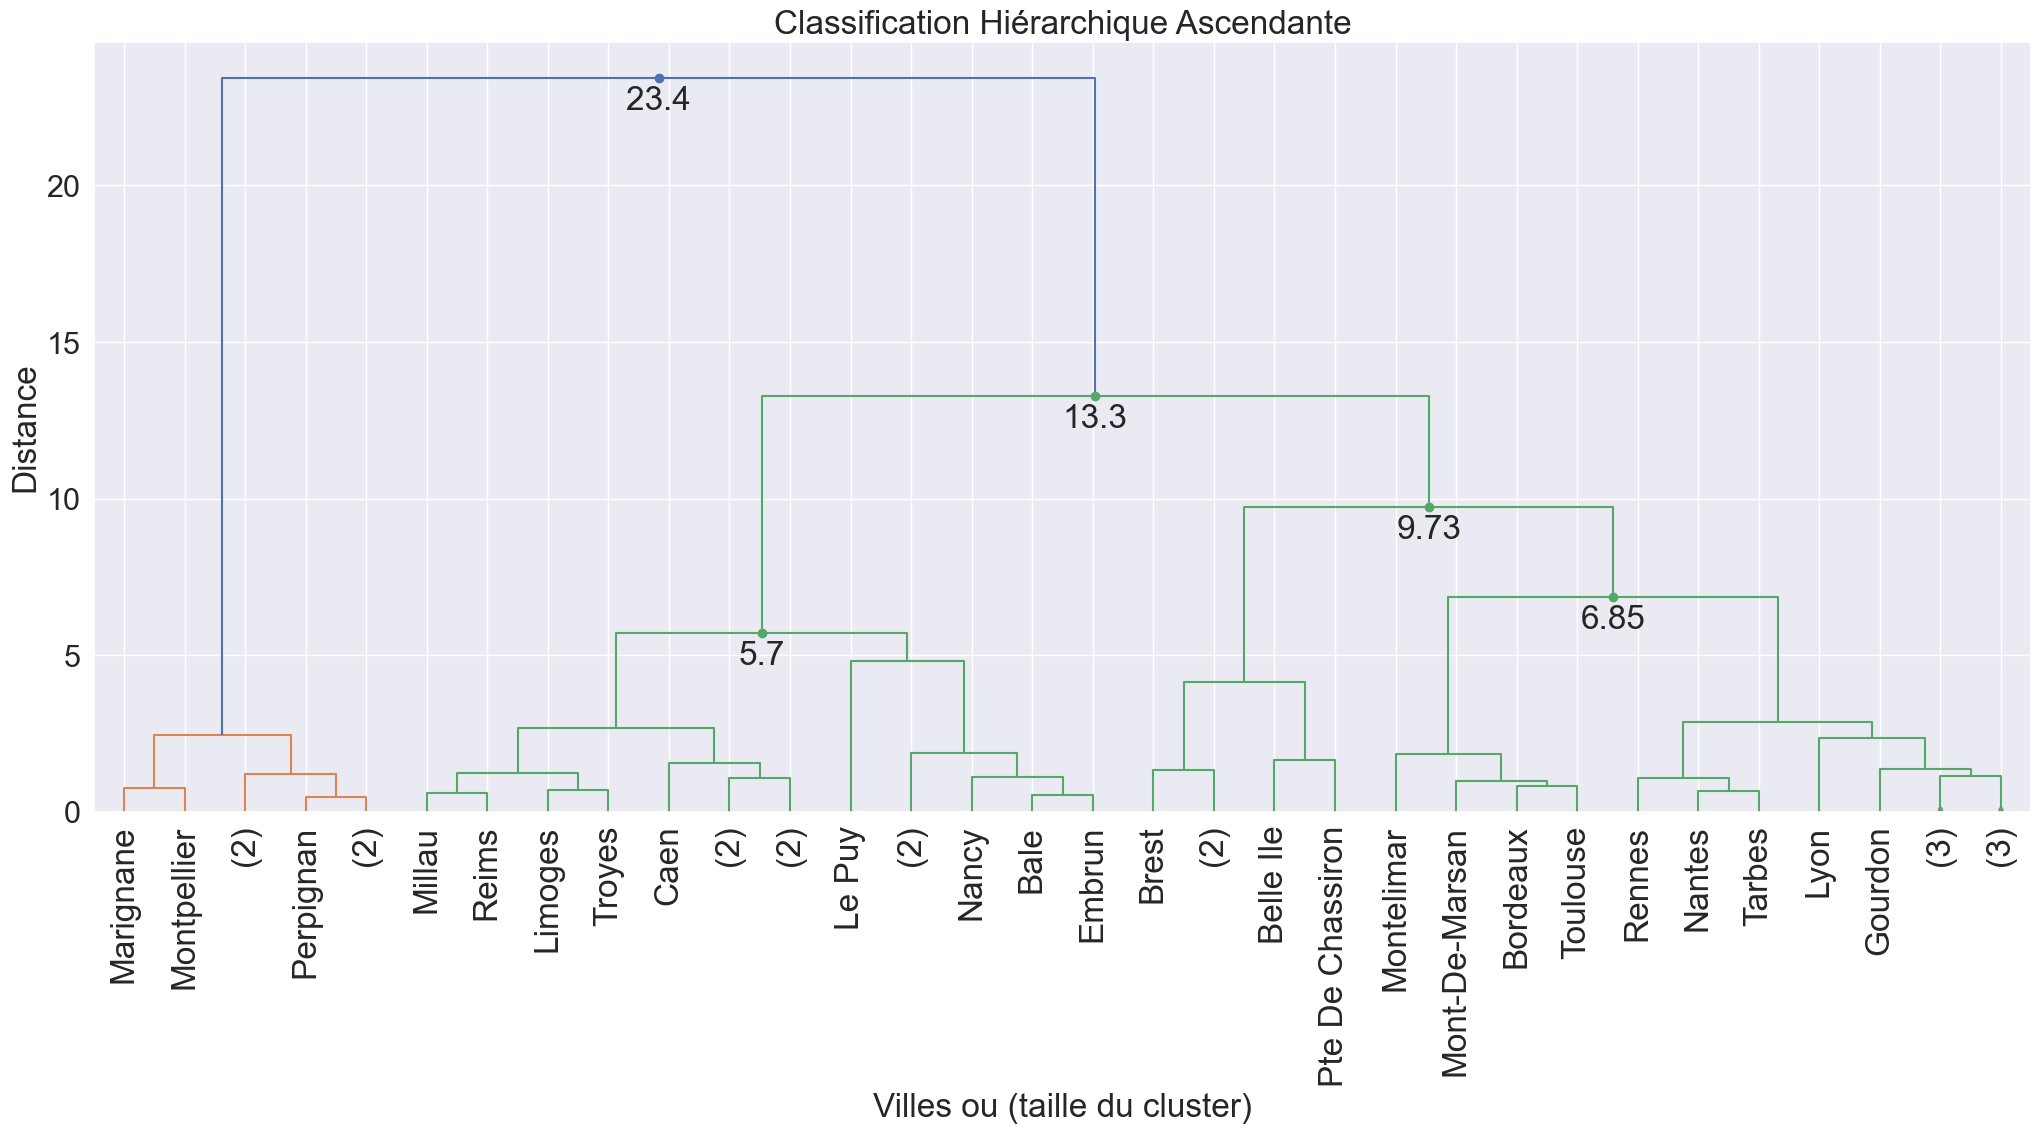

In [28]:
plt.figure(figsize=(25, 10))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
    p=32,                  # nombres des classes
    leaf_rotation=90.,
    leaf_font_size=24.,
    show_contracted=True,
    annotate_above=5,      # les annotations à partir de cette distance
    labels = Villes
)
plt.show()

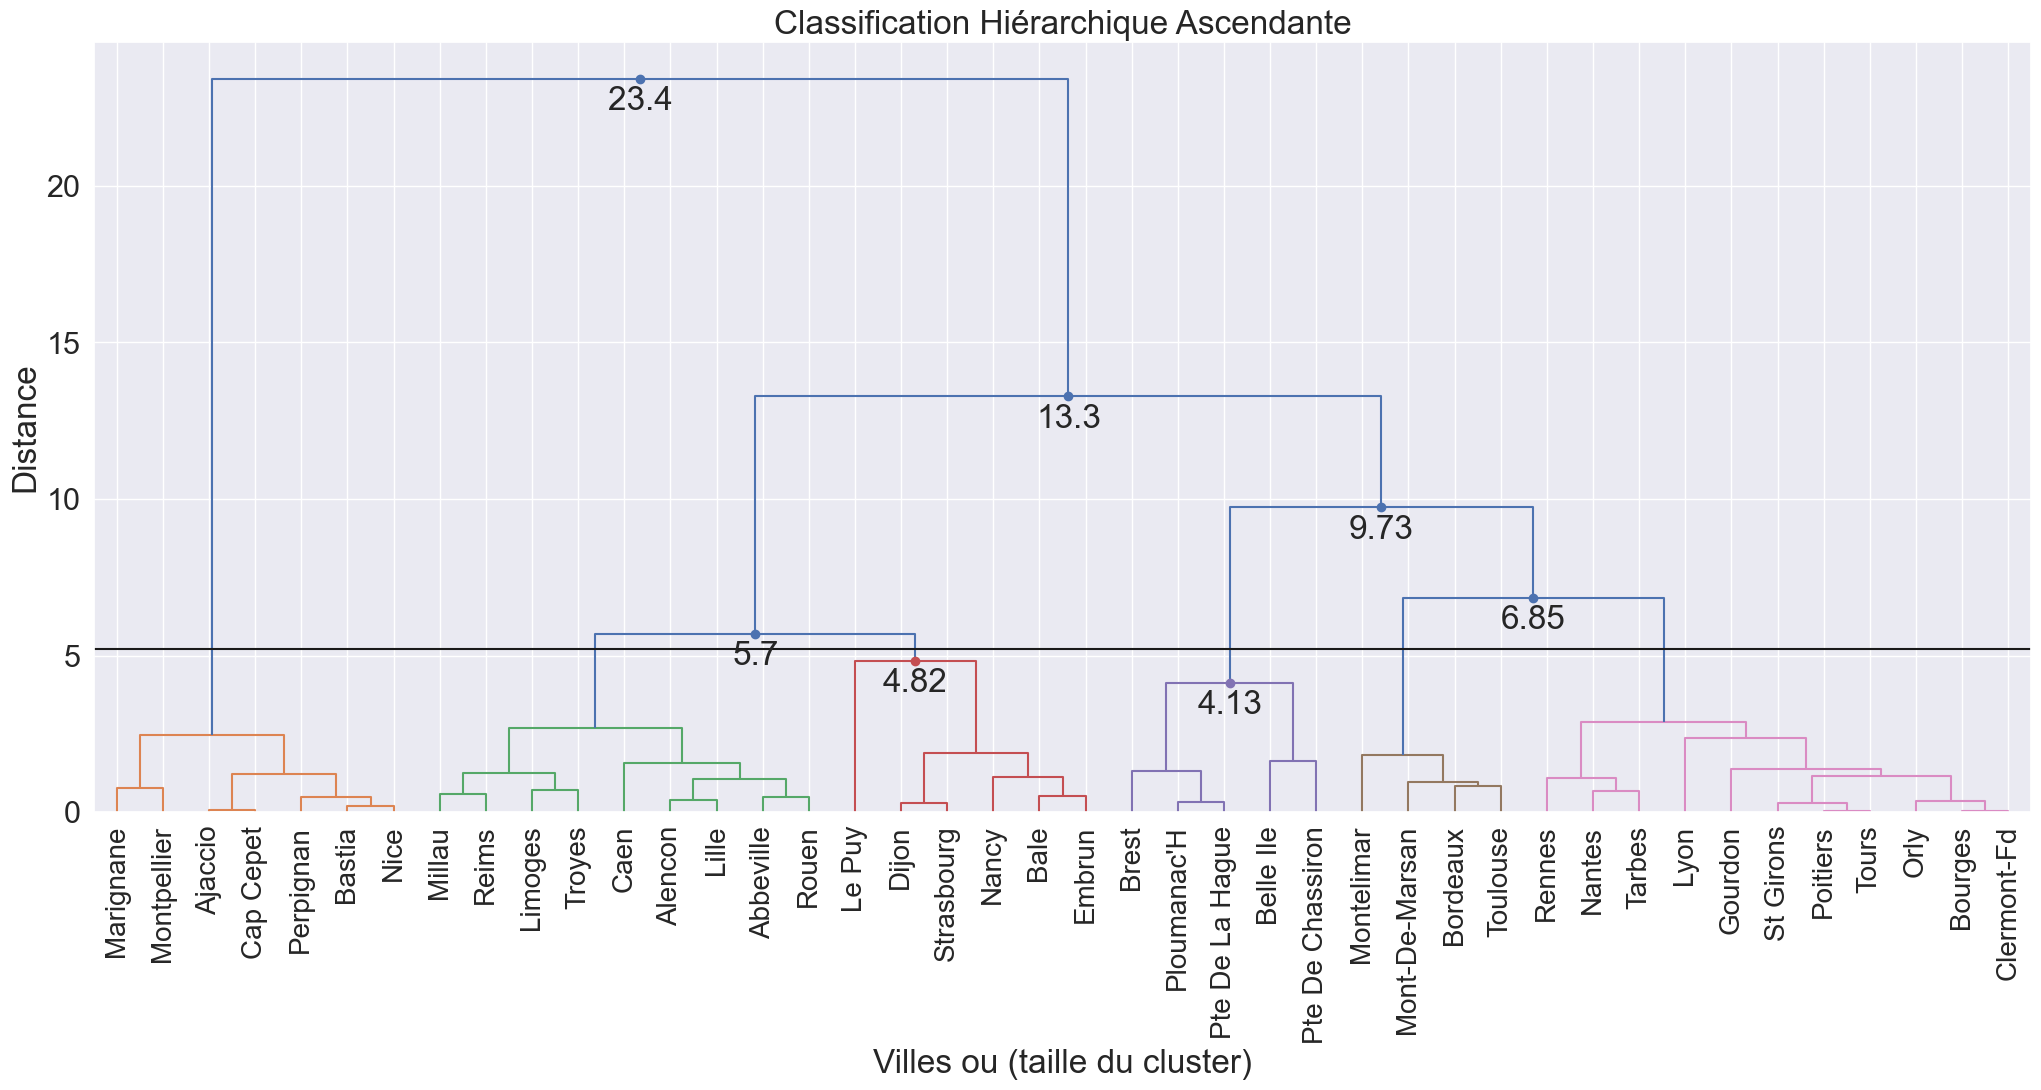

In [29]:
plt.figure(figsize=(25, 10))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
    p=42,                          # nombres des classes
    leaf_rotation=90.,
    leaf_font_size=20.,
    show_contracted=True,
    annotate_above=4,              # les annotations à partir de cette distance
    max_d=5.2,                     # la distance de découpage de l’arbre
    labels = Villes
)
plt.show()

## Prédiction des classes

In [30]:
from scipy.cluster.hierarchy import fcluster
donnees2d['Classe6']=fcluster(Z, t=5, criterion='distance')
donnees2d['Classe4']=fcluster(Z, t=7, criterion='distance')

In [31]:
donnees2d.reset_index()

Nom   Latitude  Longitude  Altitude Zone     Dim01     Dim02  \
0          Abbeville  50.136000   1.834000        69   NO  2.879743  1.071171   
1            Ajaccio  41.918000   8.792667         5   SE -5.598592  0.401231   
2            Alencon  48.445500   0.110167       143   NO  2.493413  0.507866   
3               Bale  47.614333   7.510000       263   NE  2.879361 -1.947294   
4             Bastia  42.540667   9.485167        10   SE -6.167923  0.015735   
5          Belle Ile  47.294333  -3.218333        34   NO -0.746779  3.057880   
6           Bordeaux  44.830667  -0.691333        47   SO -2.363250 -0.003414   
7            Bourges  47.059167   2.359833       161   NO  0.862944 -0.822936   
8              Brest  48.444167  -4.412000        94   NO  1.711973  3.166910   
9               Caen  49.180000  -0.456167        67   NO  2.187843  1.711468   
10         Cap Cepet  43.079333   5.940833       115   SE -5.541061  0.350099   
11       Clermont-Fd  45.786833   3.149333       331   SE  0.909238 -0.829633   
12             Dijon  47.267833   5.088333       219   NE  2.123081 -1.804441   
13            Embrun  44.565667   6.502333       871   SE  3.368802 -2.131434   
14           Gourdon  44.745000   1.396667       260   SO -0.236492 -0.491505   
15            Le Puy  45.074500   3.764000       833   SE  6.404039 -0.760544   
16             Lille  50.570000   3.097500        47   NE  2.377553  0.131245   
17           Limoges  45.861167   1.175000       402   SO  1.762934 -0.118790   
18              Lyon  45.726500   5.077833       235   SE -0.234431 -1.971771   
19         Marignane  43.437667   5.216000         9   SE -5.505674 -1.502744   
20            Millau  44.118500   3.019500       712   SE  3.004432 -0.733730   
21    Mont-De-Marsan  43.909833  -0.500167        59   SO -1.607775 -0.404855   
22        Montelimar  44.581167   4.733000        73   SE -2.662864 -1.827577   
23       Montpellier  43.577000   3.963167         2   SE -4.924997 -0.993673   
24             Nancy  48.581000   5.959833       336   NE  3.680883 -1.245811   
25            Nantes  47.150000  -1.608833        26   NO  0.066105  0.878255   
26              Nice  43.648833   7.209000         2   SE -6.238451 -0.168580   
27              Orly  48.716833   2.384333        89   NO  0.941259 -0.519195   
28         Perpignan  42.737167   2.872833        42   SE -5.945639 -0.409218   
29       Ploumanac'H  48.825833  -3.473167        55   NO  0.848452  3.671031   
30          Poitiers  46.593833   0.314333       123   NO  0.775880 -0.094006   
31  Pte De Chassiron  46.046833  -1.411500        11   SO -1.918677  1.903825   
32   Pte De La Hague  49.725167  -1.939833         6   NO  0.693563  3.963277   
33             Reims  49.209667   4.155333        95   NE  2.672365 -0.247291   
34            Rennes  48.068833  -1.734000        36   NO  0.799844  1.146393   
35             Rouen  49.383000   1.181667       151   NO  3.074681  0.631384   
36         St Girons  43.005333   1.106833       414   SO  0.537350 -0.046351   
37        Strasbourg  48.549500   7.640333       150   NE  2.098404 -2.109174   
38            Tarbes  43.188000   0.000000       360   SO  0.106589  0.204767   
39          Toulouse  43.621000   1.378833       151   SO -2.551393 -0.808194   
40             Tours  47.444500   0.727333       108   NO  0.815061 -0.129777   
41            Troyes  48.324667   4.020000       112   NE  2.168205 -0.690599   

    Classe6  Classe4  
0         2        2  
1         1        1  
2         2        2  
3         3        2  
4         1        1  
5         4        3  
6         5        4  
7         6        4  
8         4        3  
9         2        2  
10        1        1  
11        6        4  
12        3        2  
13        3        2  
14        6        4  
15        3        2  
16        2        2  
17        2        2  
18        6        4  
19        1        1  
20        2        2  
21        5        4  
22  

## Affichage des clusters 

In [32]:
fig = px.scatter(donnees2d.reset_index(), 
                    x='Dim01', 
                    y='Dim02', 
                    color='Classe4',
                    text='Nom',
                    size='Classe4',
                    width=1024,
                    height=512,
                    opacity=0.4,
                   )

fig.show()

In [33]:
fig = px.scatter(donnees2d.reset_index(), 
                    x='Dim01', 
                    y='Dim02', 
                    color='Classe6',
                    text='Nom',
                    size='Classe6',
                    width=1024,
                    height=512,
                    opacity=0.4,
                   )

fig.show()

# Clustering non hiérarchique

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(donnees3d.values)
y_kmeans = kmeans.predict(donnees3d.values)
donnees3d['Km3'] = y_kmeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(donnees3d.values)
y_kmeans = kmeans.predict(donnees3d.values)
donnees3d['Km4'] = y_kmeans

In [35]:
donnees3d.head()

Dim01     Dim02     Dim03  \
Nom       Latitude  Longitude Altitude Zone                                 
Abbeville 50.136000 1.834000  69       NO    2.879743  1.071171 -0.024267   
Ajaccio   41.918000 8.792667  5        SE   -5.598592  0.401231  0.559796   
Alencon   48.445500 0.110167  143      NO    2.493413  0.507866 -0.013326   
Bale      47.614333 7.510000  263      NE    2.879361 -1.947294 -0.157333   
Bastia    42.540667 9.485167  10       SE   -6.167923  0.015735  0.663955   

                                             Km3  Km4  
Nom       Latitude  Longitude Altitude Zone            
Abbeville 50.136000 1.834000  69       NO      0    2  
Ajaccio   41.918000 8.792667  5        SE      1    0  
Alencon   48.445500 0.110167  143      NO      0    2  
Bale      47.614333 7.510000  263      NE      0    2  
Bastia    42.540667 9.485167  10       SE      1    0

In [36]:
fig = px.scatter_3d(donnees3d.reset_index(), 
                    x='Dim01', 
                    y='Dim02', 
                    z='Dim03',
                    color='Km3',
                    text='Nom',
                    width=1024,
                    height=1024,
                   )

fig.show()

In [37]:
fig = px.scatter_3d(donnees3d.reset_index(), 
                    x='Dim01', 
                    y='Dim02', 
                    z='Dim03',
                    color='Km4',
                    text='Nom',
                    width=1024,
                    height=1024,
                   )

fig.show()